In [1]:
# Data manipulation and analysis 
import numpy as np 
import pandas as pd # Data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
# import plotly.express as px
# import bokeh.plotting as bk 

# Statistical analysis and machine learning from scipy 
# import stats from sklearn.model_selection 
# import train_test_split from sklearn.linear_model 
# import LinearRegression from sklearn.metrics 
# import mean_squared_error, r2_score 
# import statsmodels.api as sm


In [2]:
df = pd.read_csv('Dataset/MathE dataset.csv', encoding='ISO-8859-1')
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
1,41,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
2,340,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
3,641,Italy,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
4,669,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [4]:
df.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [5]:
df.shape

(9546, 8)

In [6]:
df.duplicated().sum().sum()


np.int64(2083)

In [7]:
df['Type of Answer'].unique()

array([0, 1])

In [8]:
df['Question Level'].unique()

array(['Basic', 'Advanced'], dtype=object)

Working on outliers
Working on imbalance data
Unnormal data
duplicate data 

In [9]:
duplicate_rows = df[df.duplicated()] 
duplicate_rows


,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
29,41,Portugal,79,1,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
36,57,Portugal,79,0,Basic,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
79,181,Italy,83,0,Basic,Real Functions of a single variable,"Domain, Image and Graphics",Domain Image of a function
89,1557,Portugal,87,0,Advanced,Real Functions of a single variable,Limits and Continuity,Indeterminate forms Limits
91,854,Italy,88,1,Basic,Linear Algebra,Linear Systems,Inconsistent system Square linear system Solut...
...,...,...,...,...,...,...,...,...
9524,175,Italy,1475,0,Basic,Complex Numbers,Complex Numbers,Algebraic form Real part Equations involving c...
9529,175,Italy,1485,1,Basic,Complex Numbers,Complex Numbers,Operations with complex numbers
9531,175,Italy,1486,1,Basic,Complex Numbers,Complex Numbers,Operations with complex numbers
9533,175,Italy,1487,1,Basic,Complex Numbers,Complex Numbers,Modulus of a complex number Algebraic form Rea...


In [10]:
duplicates = df[df.duplicated(keep=False)]

duplicates.to_csv('duplicates.csv', index=False)


In [11]:
# Remove duplicates (keep the first occurrence by default) 
df_no_dup = df.drop_duplicates()


In [12]:
df_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7463 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       7463 non-null   int64 
 1   Student Country  7463 non-null   object
 2   Question ID      7463 non-null   int64 
 3   Type of Answer   7463 non-null   int64 
 4   Question Level   7463 non-null   object
 5   Topic            7463 non-null   object
 6   Subtopic         7463 non-null   object
 7   Keywords         7463 non-null   object
dtypes: int64(3), object(5)
memory usage: 524.7+ KB


In [13]:
df_no_dup['Student ID'].nunique()

372

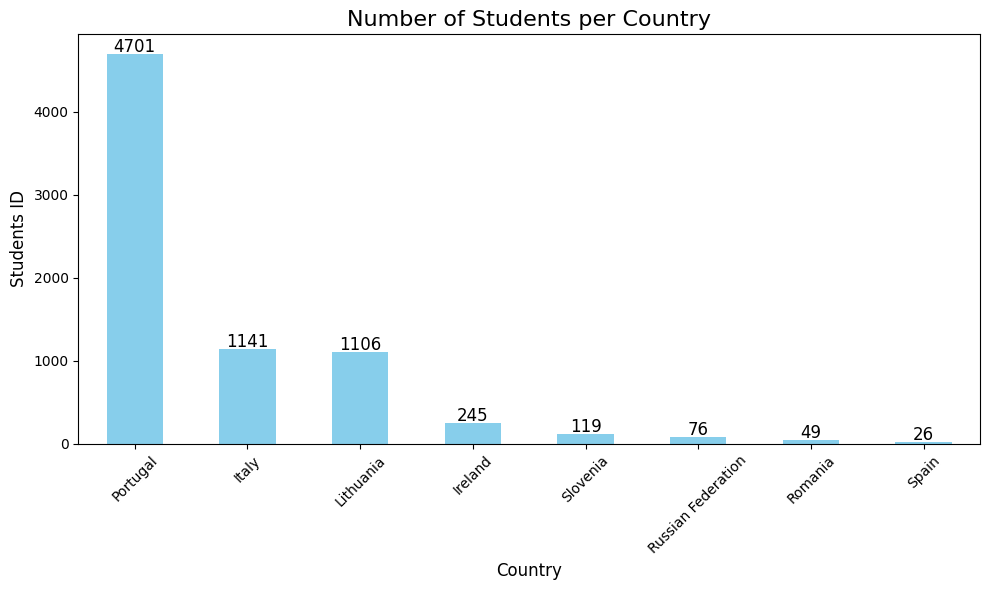

In [14]:
# Assuming df_no_dup is your DataFrame
student_counts = df_no_dup['Student Country'].value_counts()


# Plotting the data
plt.figure(figsize=(10, 6))
ax = student_counts.plot(kind='bar', color='skyblue')


# Add labels and title
plt.title('Number of Students per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel("Students ID", fontsize=12)


# Annotating the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

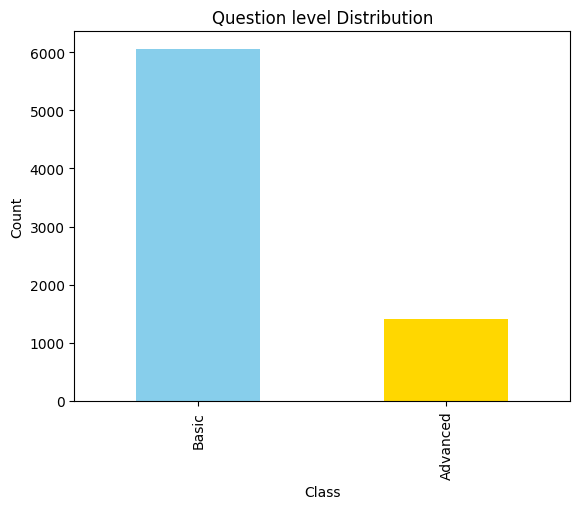

In [15]:
df_no_dup['Question Level'].value_counts().plot(kind='bar', color=['skyblue','gold'])
plt.title ('Question level Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [16]:
from sklearn.utils import resample

df_majority= df_no_dup[df_no_dup['Question Level'] == 'Basic'] 
df_minority= df_no_dup[df_no_dup['Question Level'] == 'Advanced'] 

#oversampling the minority class
df_min_over= resample(df_minority, replace= True, n_samples= len(df_majority),
random_state = 42 )

df_balance= pd.concat([df_majority,df_min_over] )
df_balance['Question Level'].value_counts()


Question Level
Basic       6053
Advanced    6053
Name: count, dtype: int64

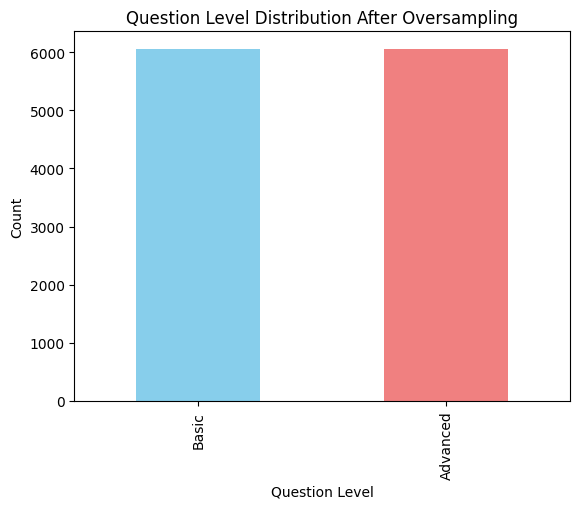

In [17]:
# Visualize the new class distribution 
df_balance['Question Level'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Question Level Distribution After Oversampling') 
plt.xlabel('Question Level') 
plt.ylabel('Count') 
plt.show()


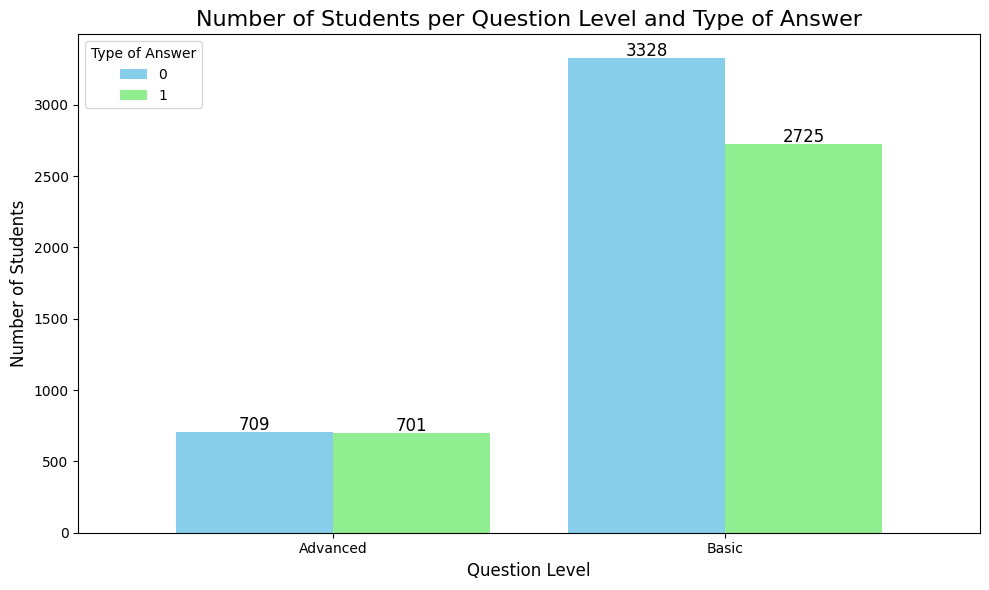

In [18]:
answer_counts = df_no_dup.groupby(['Question Level', 'Type of Answer']).size().unstack()

# Plotting the clustered (grouped) column chart
ax = answer_counts.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.title('Number of Students per Question Level and Type of Answer', fontsize=16)
plt.xlabel('Question Level', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Add a legend to differentiate answer types
plt.legend(title="Type of Answer", loc='upper left')

# Annotating the bars with numbers
for p in ax.patches:
    # Get the height of each bar (which is the count of students)
    height = p.get_height()
    
    # Add the count number above the bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center',  
                fontsize=12, color='black',  
                xytext=(0, 5), textcoords='offset points')  

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()



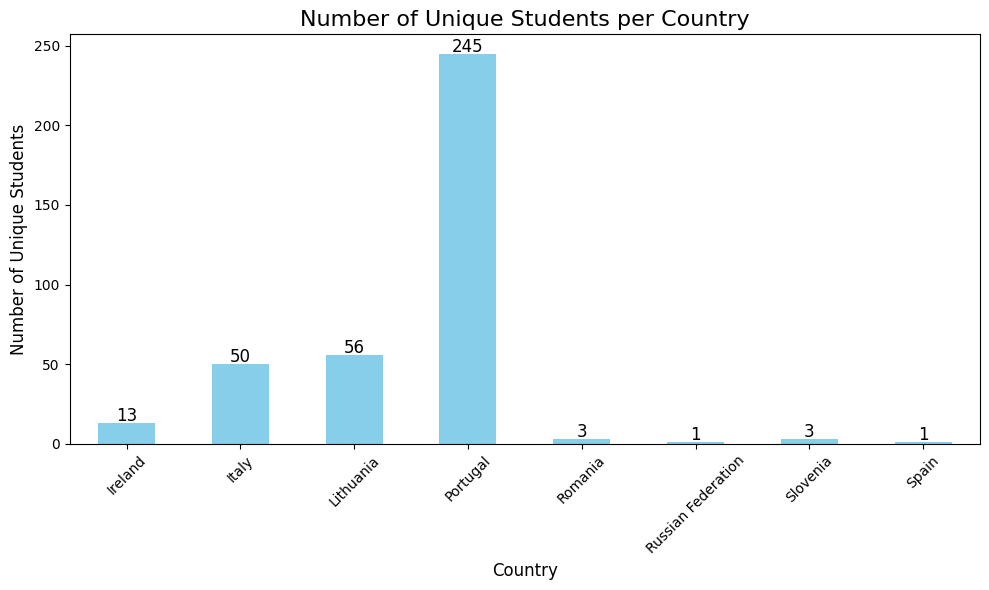

In [19]:
student_counts = df_no_dup.groupby('Student Country')['Student ID'].nunique()

# Plotting the data
plt.figure(figsize=(10, 6))
ax = student_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Number of Unique Students per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Unique Students', fontsize=12)

# Annotating the bars with the count values (unique student count)
for p in ax.patches:
    # Get the height of each bar (which is the count of unique students)
    height = p.get_height()
    
    # Add the count number above the bar
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),  # Position the text at the top of each bar
                ha='center', va='center',  # Align the text at the center of the bar
                fontsize=12, color='black',  # Set font size and color
                xytext=(0, 5), textcoords='offset points')  # Offset the text slightly above the bar

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


In [20]:
# Count the number of answers per Topic
topic_answer_counts = df.groupby('Topic')['Type of Answer'].count().reset_index(name='Number of Answers for Topic')

# Count the number of answers per Subtopic
subtopic_answer_counts = df.groupby(['Topic', 'Subtopic'])['Type of Answer'].count().reset_index(name='Number of Answers for Subtopics')

# Merge the two tables into one simple table
pivot_table = pd.merge(subtopic_answer_counts, topic_answer_counts, on='Topic', how='left')

# Sort the pivot table by Topic in ascending order
pivot_table = pivot_table.sort_values(by='Topic', ascending=True)

# Reorder columns to match your desired order
pivot_table = pivot_table[['Topic', 'Number of Answers for Topic', 'Subtopic', 'Number of Answers for Subtopics']]

# Display the resulting pivot table
pivot_table


,Topic,Number of Answers for Topic,Subtopic,Number of Answers for Subtopics
0,Analytic Geometry,358,Analytic Geometry,358
1,Complex Numbers,592,Complex Numbers,592
2,Differential Equations,108,Differential Equations,108
3,Differentiation,579,Derivatives,317
4,Differentiation,579,Partial Differentiation,262
5,Fundamental Mathematics,818,"Algebraic expressions, Equations, and Inequali...",496
6,Fundamental Mathematics,818,Elementary Geometry,322
7,Graph Theory,55,Graph Theory,55
8,Integration,144,Definite Integrals,15
9,Integration,144,Double Integration,18


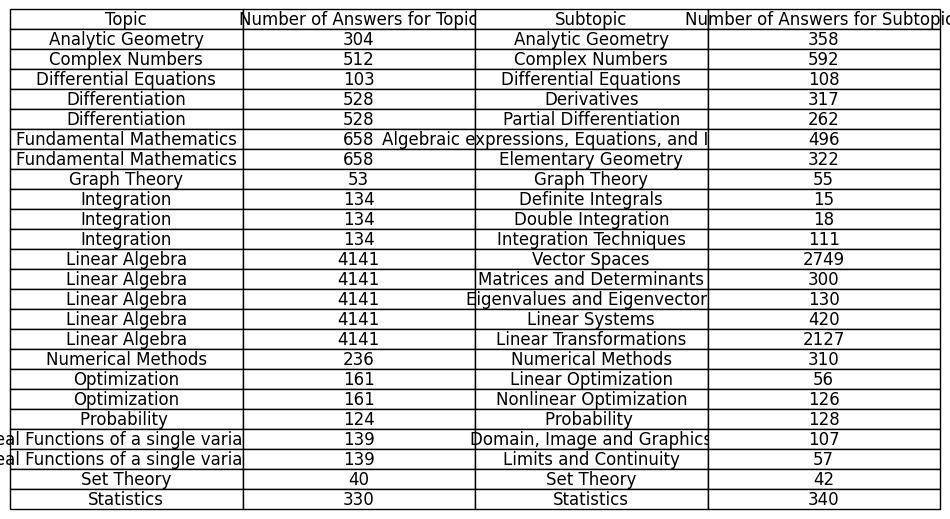

In [21]:
# Count the number of answers per Topic
topic_answer_counts = df_no_dup.groupby('Topic')['Type of Answer'].count().reset_index(name='Number of Answers for Topic')

# Count the number of answers per Subtopic
subtopic_answer_counts = df.groupby(['Topic', 'Subtopic'])['Type of Answer'].count().reset_index(name='Number of Answers for Subtopics')

# Merge the two tables into one simple table
pivot_table = pd.merge(subtopic_answer_counts, topic_answer_counts, on='Topic', how='left')

# Sort the pivot table by Topic in ascending order
pivot_table = pivot_table.sort_values(by='Topic', ascending=True)

# Reorder columns to match your desired order
pivot_table = pivot_table[['Topic', 'Number of Answers for Topic', 'Subtopic', 'Number of Answers for Subtopics']]

# Plotting the table as an image
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the image
ax.axis('off')  # Hide the axis

# Create the table
table = ax.table(cellText=pivot_table.values, 
                colLabels=pivot_table.columns, 
                cellLoc='center', 
                loc='center', 
                colLoc='center')

# Customize table appearance (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the plot as an image
plt.savefig('pivot_table_image.png', bbox_inches='tight')

# Show the table as an image
plt.show()


In [22]:
# Check the data types of the columns in df_balance 
numerical_columns = df_balance.select_dtypes(include=['int64', 'float64']).columns.tolist() 
categorical_columns = df_balance.select_dtypes(include=['object', 'category']).columns.tolist() 


# Step 2: Separate the numerical and categorical columns into two DataFrames 
df_numerical = df_balance[numerical_columns] 
df_categorical = df_balance[categorical_columns] 


# Display the results print("Numerical columns:", numerical_columns) print("Categorical columns:", categorical_columns) 

# Display the corresponding DataFrames 
print("\nNumerical DataFrame:") 
print(df_numerical.head()) 
print("\nCategorical DataFrame:") 
print(df_categorical.head())



Numerical DataFrame:
   Student ID  Question ID  Type of Answer
0         647           77               0
1          41           77               1
2         340           77               1
3         641           77               0
4         669           77               1

Categorical DataFrame:
  Student Country Question Level       Topic    Subtopic  \
0         Ireland          Basic  Statistics  Statistics   
1        Portugal          Basic  Statistics  Statistics   
2        Portugal          Basic  Statistics  Statistics   
3           Italy          Basic  Statistics  Statistics   
4        Portugal          Basic  Statistics  Statistics   

                                            Keywords  
0  Stem and Leaf diagram Relative frequency Sampl...  
1  Stem and Leaf diagram Relative frequency Sampl...  
2  Stem and Leaf diagram Relative frequency Sampl...  
3  Stem and Leaf diagram Relative frequency Sampl...  
4  Stem and Leaf diagram Relative frequency Sampl...  


In [23]:
# Define the target and features
target_column = 'Question Level'
feature_columns = ['Student ID', 'Student Country', 'Question ID', 'Type of Answer', 'Topic', 'Subtopic', 'Keywords']

X = df_balance[feature_columns]  # Features
y = df_balance[target_column]   # Target
X


,Student ID,Student Country,Question ID,Type of Answer,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
1,41,Portugal,77,1,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
2,340,Portugal,77,1,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
3,641,Italy,77,0,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
4,669,Portugal,77,1,Statistics,Statistics,Stem and Leaf diagram Relative frequency Sampl...
...,...,...,...,...,...,...,...
3069,466,Portugal,359,1,Complex Numbers,Complex Numbers,Principal argument Trigonometric form Modulus ...
7194,776,Portugal,574,1,Analytic Geometry,Analytic Geometry,Collinearity Orthogonality Distance Scalar pro...
5046,955,Lithuania,432,0,Linear Algebra,Vector Spaces,Linear independence Subspace Linear combinatio...
8155,81,Lithuania,781,0,Linear Algebra,Linear Transformations,Range Kernel


In [24]:
y

0          Basic
1          Basic
2          Basic
3          Basic
4          Basic
          ...   
3069    Advanced
7194    Advanced
5046    Advanced
8155    Advanced
5895    Advanced
Name: Question Level, Length: 12106, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode 'Basic' as 0 and 'Advanced' as 1



In [26]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
X['Keywords'].unique()

array(['Stem and Leaf diagram Relative frequency Sample Frequency',
       'Population Variance Median Standard deviation Mode Quantile Sample Mean',
       'Mean Median Mode',
       'Logarithmic rule Power rule Exponential rule Trigonometric rules Product rule',
       'Domain Image of a function', 'Indeterminate forms Limits',
       'Inconsistent system Square linear system Solution of linear system Undetermined solution of linear system Consistent system',
       'Square linear system Inconsistent system Solution of linear system Undetermined solution of linear system Consistent system',
       'Consistent system Inconsistent system Solution of linear system Undetermined solution of linear system',
       'Consistent system Square linear system Inconsistent system Solution of linear system Undetermined solution of linear system',
       'Product rule Logarithmic rule Trigonometric rules',
       'Trigonometric rules Product rule Sum rule Logarithmic rule Power rule',
       'Trigo

In [28]:
X['Student Country'].unique()

array(['Ireland', 'Portugal', 'Italy', 'Lithuania', 'Spain',
       'Russian Federation', 'Romania', 'Slovenia'], dtype=object)

In [29]:
X['Question ID'].unique()

array([  77,   78,   79,   80,   81,   82,   83,   84,   85,   88,   89,
         90,   91,   92,   93,   94,   95,   96,   97,   98,  100,  102,
        104,  108,  112,  113,  114,  118,  120,  122,  123,  125,  127,
        129,  130,  131,  134,  135,  136,  137,  138,  141,  142,  143,
        144,  145,  146,  147,  148,  153,  155,  156,  157,  159,  160,
        164,  165,  168,  169,  172,  177,  178,  179,  180,  181,  182,
        183,  184,  185,  186,  187,  188,  189,  190,  191,  192,  193,
        201,  202,  204,  211,  215,  216,  217,  218,  219,  220,  221,
        222,  223,  224,  225,  227,  228,  229,  230,  231,  233,  234,
        239,  241,  242,  243,  244,  245,  246,  250,  252,  253,  254,
        255,  256,  257,  258,  259,  260,  261,  262,  263,  264,  266,
        267,  268,  269,  270,  271,  272,  273,  274,  275,  277,  279,
        280,  281,  282,  283,  285,  287,  291,  294,  295,  296,  297,
        298,  299,  300,  301,  302,  303,  304,  3

In [30]:
X['Subtopic'].unique()

array(['Statistics', 'Derivatives', 'Domain, Image and Graphics',
       'Limits and Continuity', 'Linear Systems',
       'Algebraic expressions, Equations, and Inequalities',
       'Matrices and Determinants', 'Differential Equations',
       'Partial Differentiation', 'Nonlinear Optimization',
       'Integration Techniques', 'Linear Transformations',
       'Linear Optimization', 'Probability ', 'Vector Spaces',
       'Complex Numbers', 'Graph Theory', 'Elementary Geometry',
       'Double Integration', 'Analytic Geometry',
       'Eigenvalues and Eigenvectors', 'Numerical Methods', 'Set Theory',
       'Definite Integrals'], dtype=object)

In [31]:
X['Topic'].unique()

array(['Statistics', 'Differentiation',
       'Real Functions of a single variable', 'Linear Algebra',
       'Fundamental Mathematics', 'Differential Equations',
       'Optimization', 'Integration', 'Probability ', 'Complex Numbers',
       'Graph Theory', 'Analytic Geometry', 'Numerical Methods',
       'Set Theory'], dtype=object)

In [32]:
X_encoded = pd.get_dummies(X, columns=['Student Country', 'Topic', 'Subtopic', 'Keywords'], drop_first=True)

In [33]:
# Encode the target if necessary
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Calculate correlations
correlation_matrix = X_encoded.corrwith(pd.Series(y_encoded))
correlation_matrix.sort_values(ascending=False)


Subtopic_Vector Spaces                       0.291471
Topic_Linear Algebra                         0.256807
Subtopic_Complex Numbers                     0.217158
Topic_Complex Numbers                        0.217158
Keywords_Subspace Linear combination Span    0.123046
                                               ...   
Subtopic_Numerical Methods                  -0.197437
Topic_Numerical Methods                     -0.197437
Topic_Fundamental Mathematics               -0.210184
Subtopic_Analytic Geometry                  -0.267086
Question ID                                 -0.803497
Length: 409, dtype: float64

In [34]:
print(correlation_matrix.sort_values(ascending=False))

Subtopic_Vector Spaces                       0.291471
Topic_Linear Algebra                         0.256807
Subtopic_Complex Numbers                     0.217158
Topic_Complex Numbers                        0.217158
Keywords_Subspace Linear combination Span    0.123046
                                               ...   
Subtopic_Numerical Methods                  -0.197437
Topic_Numerical Methods                     -0.197437
Topic_Fundamental Mathematics               -0.210184
Subtopic_Analytic Geometry                  -0.267086
Question ID                                 -0.803497
Length: 409, dtype: float64


In [35]:
# Dropping 'Keywords' and 'Student ID' columns
df = df.drop(columns=['Keywords', 'Student ID'])
# Verifying the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student Country  9546 non-null   object
 1   Question ID      9546 non-null   int64 
 2   Type of Answer   9546 non-null   int64 
 3   Question Level   9546 non-null   object
 4   Topic            9546 non-null   object
 5   Subtopic         9546 non-null   object
dtypes: int64(2), object(4)
memory usage: 447.6+ KB


In [36]:
# Remove duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2868 entries, 0 to 9545
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student Country  2868 non-null   object
 1   Question ID      2868 non-null   int64 
 2   Type of Answer   2868 non-null   int64 
 3   Question Level   2868 non-null   object
 4   Topic            2868 non-null   object
 5   Subtopic         2868 non-null   object
dtypes: int64(2), object(4)
memory usage: 156.8+ KB


In [37]:
# One-Hot Encode 'Student Country', 'Topic', and 'Subtopic'
df_encoded = pd.get_dummies(df, columns=['Student Country', 'Topic', 'Subtopic'], drop_first=True)

In [38]:
from sklearn.preprocessing import LabelEncoder


# Label Encode 'Question Level' (target variable)
label_encoder = LabelEncoder()
df['Question Level'] = label_encoder.fit_transform(df['Question Level'])

In [39]:
df_encoded.head()

,Question ID,Type of Answer,Question Level,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,...,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
0,77,0,Basic,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,77,1,Basic,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,77,0,Basic,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,77,0,Basic,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,77,0,Basic,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [40]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = df_encoded.drop(columns=['Question Level'])  # Drop the target column
y = df_encoded['Question Level']  # Target column


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [42]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}
    


In [43]:
# Store results
results = {}


for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
   
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
   
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else "N/A"
   
    # Save results
    results[model_name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Precision (Basic)": report['Basic']['precision'],
        "Recall (Basic)": report['Basic']['recall'],
        "F1-Score (Basic)": report['Basic']['f1-score'],
        "Precision (Advanced)": report['Advanced']['precision'],
        "Recall (Advanced)": report['Advanced']['recall'],
        "F1-Score (Advanced)": report['Advanced']['f1-score']
    }


# Display results
results_df = pd.DataFrame(results).T
results_df


c:\Users\Emmanuel Nti-Asante\Desktop\ETHICS IN AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Emmanuel Nti-Asante\Desktop\ETHICS IN AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Emmanuel Nti-Asante\Desktop\ETHICS IN AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,Accuracy,ROC AUC,Precision (Basic),Recall (Basic),F1-Score (Basic),Precision (Advanced),Recall (Advanced),F1-Score (Advanced)
Logistic Regression,0.828107,0.802796,0.827465,0.998584,0.905006,0.888889,0.051613,0.097561
Random Forest,0.853659,0.894659,0.915473,0.905099,0.910256,0.588957,0.619355,0.603774
Gradient Boosting,0.901278,0.926917,0.895541,0.995751,0.942991,0.960526,0.470968,0.632035
SVM,0.819977,0.590441,0.819977,1.000000,0.901085,0.000000,0.000000,0.000000


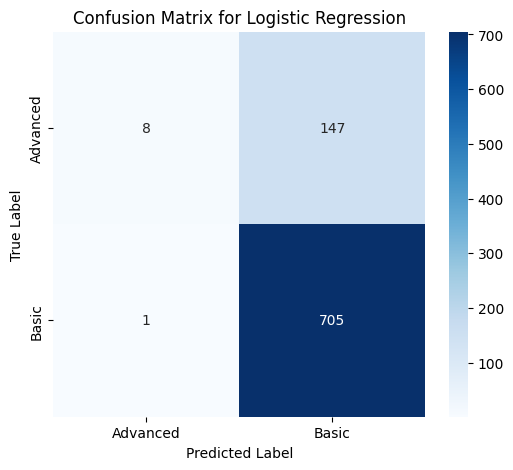

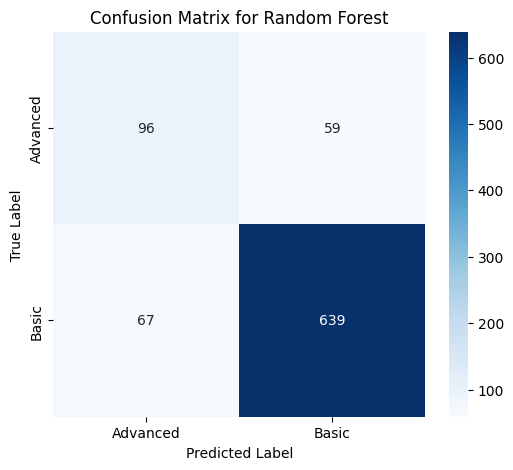

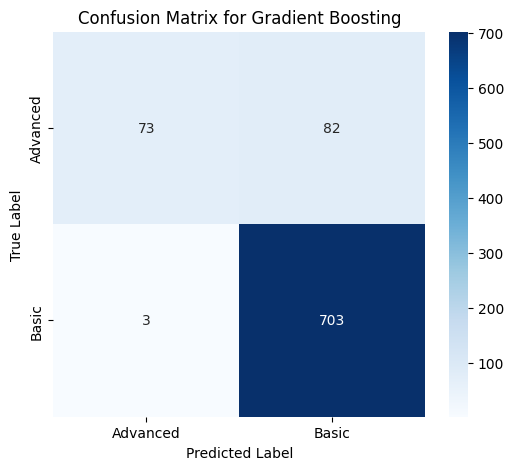

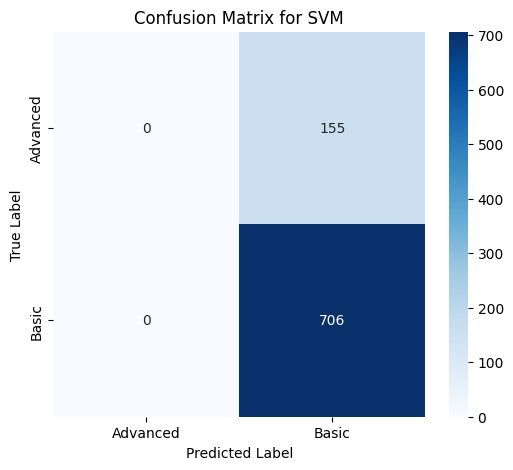

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Generate confusion matrix for each model
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
   
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
   
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Confusion Matrix for Logistic Regression:
TP: 705, TN: 8, FP: 147, FN: 1


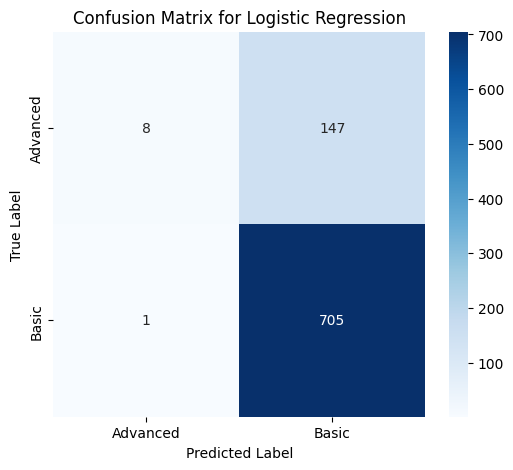

Confusion Matrix for Random Forest:
TP: 639, TN: 96, FP: 59, FN: 67


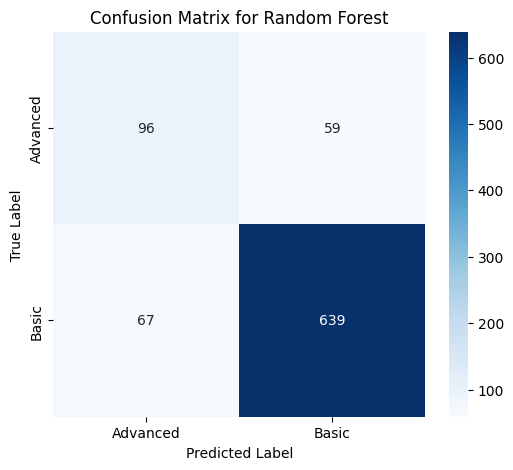

Confusion Matrix for Gradient Boosting:
TP: 703, TN: 73, FP: 82, FN: 3


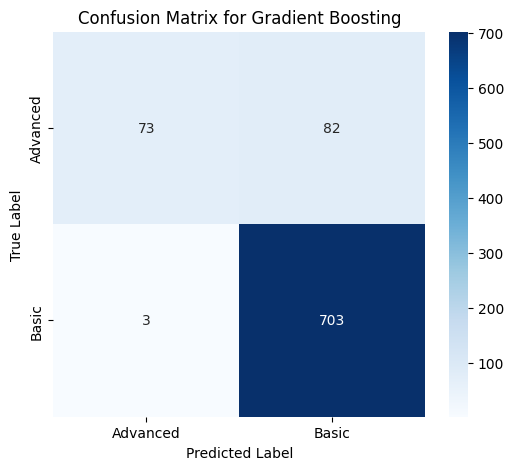

Confusion Matrix for SVM:
TP: 706, TN: 0, FP: 155, FN: 0


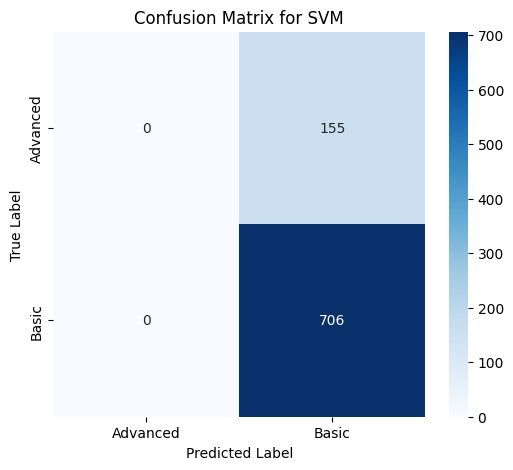

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Generate confusion matrix for each model
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
   
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
   
    # Extract TP, TN, FP, FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
   
    # Print the confusion matrix with TP, TN, FP, FN
    print(f"Confusion Matrix for {model_name}:")
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
   
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
